# Task 2 : Unemployment Rate analysis in India  

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
df = pd.read_csv("Unemployment in India.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


##### Drop null values

In [5]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df.dropna(inplace=True)

##### Duplicate NA values

In [8]:
df.duplicated().sum()

0

##### Describe the data

In [10]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

##### Remove spaces from the columns

In [13]:
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

##### Handling Date Structures

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [29]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


In [28]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Day,Year
count,740,740.000000,7.400000e+02,740.000000,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,30.502703,2019.418919
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,29.000000,2019.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,30.000000,2019.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,31.000000,2019.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,31.000000,2020.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,31.000000,2020.000000
std,NaN,10.721298,8.087988e+06,8.111094,0.627509,0.493716


In [30]:
print(f"The mean and standard deviation of the unemployment: {df['Estimated Unemployment Rate (%)'].mean()} and {df['Estimated Unemployment Rate (%)'].std()}")

The mean and standard deviation of the unemployment: 11.787945945945946 and 10.721298373157786


## EDA and Visualization

#### Unemployment with respect to the time

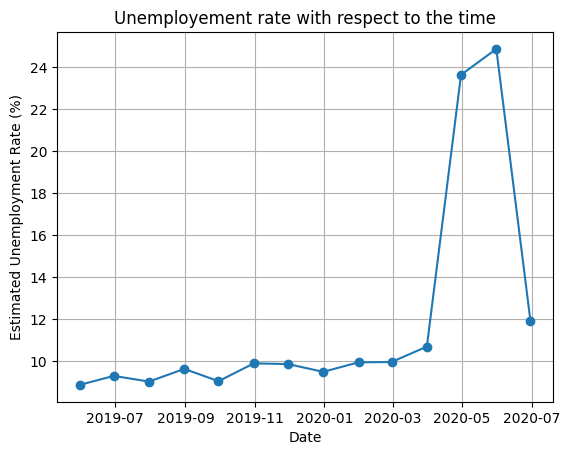

In [45]:
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.plot(mean_unemployment_over_time.index,mean_unemployment_over_time.values,marker='o')
plt.title('Unemployement rate with respect to the time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid()

Here we clearly see that the in time of covid 2020 the unemployment rate is higher

### Unemployement rate with respect to region

In [50]:
figure = px.bar(df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title="Average Unemployment Rate (%)")
figure.update_layout(xaxis = {'categoryorder':'total descending'})
figure.show()

### Participation rate with respect to the area

In [54]:
fig = px.bar(df,x='Region',y='Estimated Labour Participation Rate (%)',color='Region',title="Average Participation Rate (%)")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()


#### Estimated Employment Rate with respect to Region

In [61]:
fig = px.bar(df,x='Region',y='Estimated Employed',color='Region',title="Average Estimated Employed ")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

#### Uttar Pradesh has highest employment 

In [51]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


### Estimate the employement with respect to the month 

In [62]:
fig = px.bar(df,x='Month',y='Estimated Employed',color='Month',title="Estimated Employed Month wise")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

#### Estimate the Unemployment Rate with respect to the Area

In [65]:
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()

##### In the plot Rular area has higher unemployment rate

### Correlation Analysis

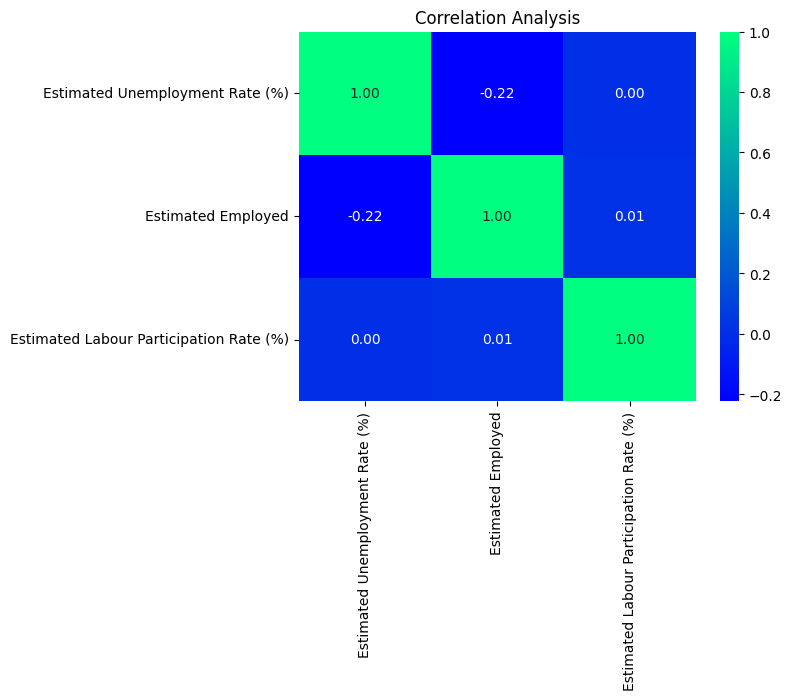

In [69]:
sns.heatmap(df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr(), annot=True,cmap='winter',fmt=".2f")
plt.title("Correlation Analysis")
plt.show()


##### 1. Here we clearly see that the Estimate Unemployment Rate has no relation with Estimated Labour Participation
##### 2. Estimated Employeed is negatively to the Unemployement Rate 
##### 3. Very clear view that if the Participation increases then the Estimated Employed will be rised

## Static Relationship Analysis

In [70]:
from scipy.stats import ttest_ind

urban_unemployment = df[df['Area'] == 'Urban']['Estimated Unemployment Rate (%)']
rural_unemployment = df[df['Area'] == 'Rural']['Estimated Unemployment Rate (%)']

t_stat, p_val = ttest_ind(urban_unemployment, rural_unemployment)
print(f'T-Statistic: {t_stat:.2f}')
print(f'P-Value: {p_val:.2f}')

T-Statistic: 3.63
P-Value: 0.00


##### Count plot of area

<Axes: xlabel='Area'>

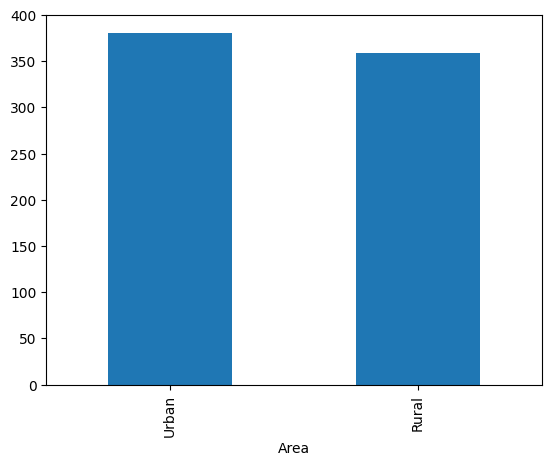

In [75]:
df['Area'].value_counts().plot(kind='bar')

#### Count of the Region

<Axes: xlabel='Region'>

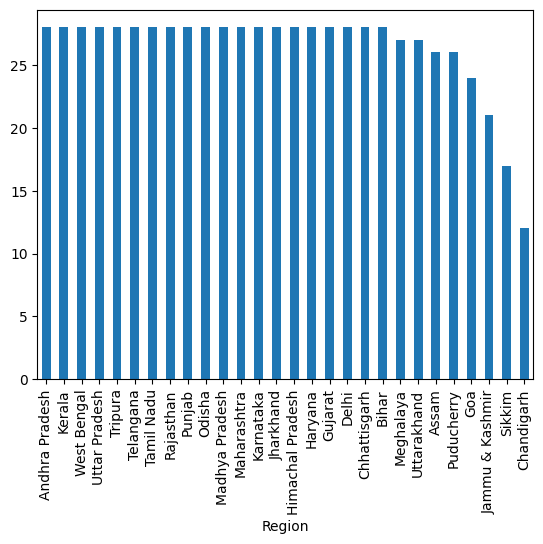

In [76]:
df['Region'].value_counts().plot(kind='bar')